In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    roc_auc_score, 
    ConfusionMatrixDisplay,
    confusion_matrix
)

from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

from sklearn import tree

In [2]:
transactions = pd.read_csv('train_transaction.csv')
transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
identity = pd.read_csv('train_identity.csv')
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
joined_data = transactions.merge(identity,on='TransactionID',how='left')

In [5]:
joined_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
del transactions
del identity

In [7]:
# Para esta tercera parte, separaré mi train-validation en 80-20
train = joined_data.loc[joined_data.index <= (len(joined_data)*0.8)]
validation = joined_data.loc[joined_data.index >= (len(joined_data)*0.8)]

In [8]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
# Comienzo la busqueda de los mejor features para mi modelo de ML, para eso, primeramente saco los obligatorios a usar, 
# estos son id_31, id_33, DeviceType, DeviceInfo.
# Para los features categoricos, usare la ganancia de informacion para dejarlos o sacarlos
# Para los features numericos, en base a su correlacion.

In [10]:
features_categoricos = []
feature_numeric = []
obligatorios = ['id_31', 'id_33', 'DeviceType', 'DeviceInfo']

for c in train.columns:
    if train[c].dtype == object and c not in obligatorios:
        features_categoricos.append(c)
    elif train[c].dtype != object and c not in obligatorios:
        feature_numeric.append(c)

In [10]:
# Para la seleccion de features categóricos utilizaré mutual_info_classif, donde obtendré una lista de los
# features que mas informacion aportan a mi set de datos

### Feature Selector
---
Para algunos features categoricos usaré el feature selector de sklearn

In [11]:
# Separo en un nuevo dataframe para los features categoricos.
X_fc_train = train[features_categoricos]
X_fc_train.fillna('desconocido',inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [13]:
# Primero para utilizar los features selectors, debo encodiar las columnas.
# Estas las haré usando OrdinalEncoder
categorical_ec_dic = {}
for c in X_fc_train.columns:
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
    categorical_ec_dic[c] = ordinal_encoder
    X_fc_train[c] = ordinal_encoder.fit_transform(X_fc_train[c].astype(str).values.reshape(-1,1))

<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fc_train[c] = ordinal_encoder.fit_transform(X_fc_train[c].astype(str).values.reshape(-1,1))
<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fc_train[c] = ordinal_encoder.fit_transform(X_fc_train[c].astype(str).values.reshape(-1,1))
<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fc_train[c] = ordinal_encoder.fit_transform(X_fc_train[c].astype(str).values.reshape(-1,1))
<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fc_train[c] = ordinal_encoder.fit_transform(X_fc_train[c].astype(str).values.reshape(-1,1))
<ipython-input-13-f1cfe8a27be5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [14]:
# Entreno el Feature Selector.
Y_fc_train = train.isFraud
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit_transform(X_fc_train,Y_fc_train)

array([[4., 2., 1., ..., 2., 2., 2.],
       [4., 3., 1., ..., 2., 2., 2.],
       [4., 4., 2., ..., 2., 2., 2.],
       ...,
       [4., 3., 2., ..., 2., 2., 2.],
       [4., 4., 1., ..., 2., 2., 2.],
       [0., 4., 2., ..., 0., 1., 0.]])

In [15]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (features_categoricos[i], fs.scores_[i]))

Feature ProductCD: 0.086447
Feature card4: 0.059572
Feature card6: 0.078911
Feature P_emaildomain: 0.026984
Feature R_emaildomain: 0.066458
Feature M1: 0.056885
Feature M2: 0.056837
Feature M3: 0.055220
Feature M4: 0.049474
Feature M5: 0.059543
Feature M6: 0.036230
Feature M7: 0.067618
Feature M8: 0.064685
Feature M9: 0.064034
Feature id_12: 0.082189
Feature id_15: 0.080061
Feature id_16: 0.088284
Feature id_23: 0.098035
Feature id_27: 0.108087
Feature id_28: 0.087139
Feature id_29: 0.087876
Feature id_30: 0.075971
Feature id_34: 0.006114
Feature id_35: 0.088334
Feature id_36: 0.091120
Feature id_37: 0.083670
Feature id_38: 0.086289


In [16]:
len(features_categoricos)

27

In [17]:
# Ya tengo la lista de los indices para los features mas importantes numericos,
# procedo a quedarme con esos de mi lista de train
features_categoricos_mas_importantes = []
scores = pd.Series(fs.scores_)
for i in range(len(features_categoricos)):
    if i in scores.nlargest(20).index:
        features_categoricos_mas_importantes.append(features_categoricos[i])

In [18]:
#Limpio la memoria ya que no uso mas estos dataframes
del scores
del X_fc_train
del Y_fc_train

In [91]:
#minf = train[most_important_numeric_features] # Most important numeric features
minf = train[feature_numeric] # Most important numeric features

In [90]:
final_categorical_feature = features_categoricos_mas_importantes + obligatorios
#final_categorical_feature = features_categoricos + obligatorios
micf = train[final_categorical_feature] # Most important category features

In [21]:
minf

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,0,86400,68.500,13926,NaN,150.0,142.0,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,2755,404.0,150.0,102.0,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,4663,490.0,150.0,166.0,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,18132,567.0,150.0,117.0,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,4497,514.0,150.0,102.0,420.0,87.0,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472428,3459428,0,12192736,49.000,17188,321.0,150.0,226.0,220.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472429,3459429,0,12192742,40.000,16659,170.0,150.0,226.0,272.0,87.0,...,166.0,NaN,312.0,597.0,NaN,NaN,NaN,NaN,NaN,24.0
472430,3459430,0,12192743,15.000,7919,194.0,150.0,166.0,220.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472431,3459431,0,12192842,49.000,13749,321.0,150.0,226.0,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
del minf['isFraud']

In [18]:
# Ya tengo los features numericos y categoricos que voy a utilizar, comienzo la etapa de encoding.
# Para id_31, DeviceInfo,R_emaildomain,usaré el CountVectorizer
# Para ProductCD, card4, card6,DeviceType id_23, es decir, aquellas que posee poca cardinalidad usaré One-Hot-Encoding.
# Para el resto de las categoricas usaré Mean-Encoding

In [100]:
print(micf.shape)
micf.isnull().sum()

(472433, 24)


ProductCD             0
card4                 0
card6                 0
R_emaildomain         0
M5                    0
M7                    0
M8                    0
M9                    0
id_12                 0
id_15                 0
id_16                 0
id_23                 0
id_27                 0
id_28                 0
id_29                 0
id_30                 0
id_35                 0
id_36                 0
id_37                 0
id_38                 0
id_31                 0
id_33            410620
DeviceType            0
DeviceInfo            0
dtype: int64

In [94]:
# Las columnas que tienen poca caardinalidad y usare con hot-one-encoding, reemplazo los nans por "desconocido"
micf['id_23'].fillna('IP_Desconocido',inplace=True)
micf['card4'].fillna('card4_desconocido',inplace=True)
micf['card6'].fillna('card6_desconocido',inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [43]:
micf

,ProductCD,card4,card6,R_emaildomain,M5,M7,M8,M9,id_12,id_15,...,id_29,id_30,id_35,id_36,id_37,id_38,id_31,id_33,DeviceType,DeviceInfo
0,W,discover,credit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
1,W,mastercard,credit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,W,visa,debit,NaN,1,1,1,1,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
3,W,mastercard,debit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
4,H,mastercard,credit,NaN,0,0,0,0,1,New,...,NotFound,Android 7.0,1,1,1,1,samsung browser 6.2,2220x1080,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472428,W,visa,debit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
472429,H,visa,credit,gmail.com,0,0,0,0,1,Found,...,Found,Mac OS X 10_13_3,1,1,1,1,chrome 65.0,1440x900,desktop,MacOS
472430,W,mastercard,debit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN
472431,W,visa,credit,NaN,1,0,0,0,0,Unknown,...,id_29_Unknown,NaN,0,0,0,0,NaN,NaN,NaN,NaN


In [95]:
# Para estas columnas voy a usar mean-encoding
micf['id_15'].fillna('Unknown',inplace=True)
micf['id_29'].fillna('id_29_Unknown',inplace=True)
micf['id_28'].fillna('id_28_Unknown',inplace=True)
micf['id_16'].fillna('id_16_Unknown',inplace=True)

In [96]:
# Para los features de True-False, dado la cantidad de NaNs, pongo 1 si hay valor y 0 sino
micf['id_27'] = micf['id_27'].isnull().map({True:0,False:1})
micf['id_36'] = micf['id_36'].isnull().map({True:0,False:1})
micf['id_38'] = micf['id_38'].isnull().map({True:0,False:1})
micf['id_37'] = micf['id_37'].isnull().map({True:0,False:1})
micf['id_12'] = micf['id_12'].isnull().map({True:0,False:1})
micf['M9'] = micf['M9'].isnull().map({True:0,False:1})
micf['M8'] = micf['M8'].isnull().map({True:0,False:1})
micf['M7'] = micf['M7'].isnull().map({True:0,False:1})
micf['M5'] = micf['M5'].isnull().map({True:0,False:1})
micf['id_35'] = micf['id_35'].isnull().map({True:0,False:1})

<ipython-input-96-9487c01df59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['id_27'] = micf['id_27'].isnull().map({True:0,False:1})
<ipython-input-96-9487c01df59b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['id_36'] = micf['id_36'].isnull().map({True:0,False:1})
<ipython-input-96-9487c01df59b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [32]:
#micf['M1'] = micf['M1'].isnull().map({True:0,False:1})
#micf['M2'] = micf['M2'].isnull().map({True:0,False:1})
#micf['M3'] = micf['M3'].isnull().map({True:0,False:1})

<ipython-input-32-268b9c815d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['M1'] = micf['M1'].isnull().map({True:0,False:1})
<ipython-input-32-268b9c815d5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['M2'] = micf['M2'].isnull().map({True:0,False:1})
<ipython-input-32-268b9c815d5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [35]:
#micf['M6'] = micf['M6'].isnull().map({True:0,False:1})

<ipython-input-35-359e3c4be80b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['M6'] = micf['M6'].isnull().map({True:0,False:1})


In [38]:
#micf['id_34'] = micf['id_34'].isnull().map({True:0,False:1})

<ipython-input-38-729ea7ef1fa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['id_34'] = micf['id_34'].isnull().map({True:0,False:1})


In [97]:
# Las columnas que tendran one hot
count_vectorized_columns = ['R_emaildomain','id_30','id_31','DeviceInfo']

# Primero le cambio los NaNs por desconocido_columna
for c in micf.columns:
    if c in count_vectorized_columns:
        micf[c].fillna('Desconocido_'+c,inplace=True)

In [46]:
micf.head()

,ProductCD,card4,card6,R_emaildomain,M5,M7,M8,M9,id_12,id_15,...,id_29,id_30,id_35,id_36,id_37,id_38,id_31,id_33,DeviceType,DeviceInfo
0,W,discover,credit,Desconocido_R_emaildomain,1,0,0,0,0,Unknown,...,id_29_Unknown,Desconocido_id_30,0,0,0,0,Desconocido_id_31,NaN,NaN,Desconocido_DeviceInfo
1,W,mastercard,credit,Desconocido_R_emaildomain,1,0,0,0,0,Unknown,...,id_29_Unknown,Desconocido_id_30,0,0,0,0,Desconocido_id_31,NaN,NaN,Desconocido_DeviceInfo
2,W,visa,debit,Desconocido_R_emaildomain,1,1,1,1,0,Unknown,...,id_29_Unknown,Desconocido_id_30,0,0,0,0,Desconocido_id_31,NaN,NaN,Desconocido_DeviceInfo
3,W,mastercard,debit,Desconocido_R_emaildomain,1,0,0,0,0,Unknown,...,id_29_Unknown,Desconocido_id_30,0,0,0,0,Desconocido_id_31,NaN,NaN,Desconocido_DeviceInfo
4,H,mastercard,credit,Desconocido_R_emaildomain,0,0,0,0,1,New,...,NotFound,Android 7.0,1,1,1,1,samsung browser 6.2,2220x1080,mobile,SAMSUNG SM-G892A Build/NRD90M


In [99]:
micf['DeviceType'] = micf['DeviceType'].fillna('desconocido')

<ipython-input-99-468046d689f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micf['DeviceType'] = micf['DeviceType'].fillna('desconocido')


In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
count_vectorized_dic = {}
copy_mcf = micf.copy()
for c in copy_mcf.columns:
    if c in count_vectorized_columns:
        cv = CountVectorizer(max_features=20)
        encoded =  cv.fit_transform(copy_mcf[c])
        count_vectorized_dic[c] = cv
        encoded_dt = pd.DataFrame(encoded.toarray(),columns= cv.get_feature_names_out())
        copy_mcf = pd.concat([copy_mcf,encoded_dt],axis=1)
        del copy_mcf[c]

In [103]:
copy_mcf.head()

,ProductCD,card4,card6,M5,M7,M8,M9,id_12,id_15,id_16,...,mmb29k,mmb29m,moto,mra58k,nrd90m,rv,samsung,sm,trident,windows
0,W,discover,credit,1,0,0,0,0,Unknown,id_16_Unknown,...,0,0,0,0,0,0,0,0,0,0
1,W,mastercard,credit,1,0,0,0,0,Unknown,id_16_Unknown,...,0,0,0,0,0,0,0,0,0,0
2,W,visa,debit,1,1,1,1,0,Unknown,id_16_Unknown,...,0,0,0,0,0,0,0,0,0,0
3,W,mastercard,debit,1,0,0,0,0,Unknown,id_16_Unknown,...,0,0,0,0,0,0,0,0,0,0
4,H,mastercard,credit,0,0,0,0,1,New,NotFound,...,0,0,0,0,1,0,1,1,0,0


In [47]:
#copy_mcf['M4'] = copy_mcf['M4'].fillna('desconocido_M4')

In [104]:
copy_mcf['id_33'] = copy_mcf['id_33'].fillna('id_33_desconocido')

In [105]:
# Comienzo a hacer los hot encodings.
hot_encodings = ['ProductCD', 'card4','card6','DeviceType','id_23']
hot_encodings_dic = {}
for c in copy_mcf.columns:
    if c in hot_encodings:
        hot_encoder = OneHotEncoder(handle_unknown='ignore')
        encoded =  hot_encoder.fit_transform(copy_mcf[[c]].astype(str)).todense().astype(int)
        hot_encodings_dic[c] = hot_encoder
        column_encoded = pd.DataFrame(encoded).add_prefix('ec_'+c)
        copy_mcf = pd.concat([copy_mcf,column_encoded],axis=1)
        del copy_mcf[c]

In [106]:
copy_mcf.head()

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,ec_card62,ec_card63,ec_card64,ec_id_230,ec_id_231,ec_id_232,ec_id_233,ec_DeviceType0,ec_DeviceType1,ec_DeviceType2
0,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,1,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,1,0,0,1,0,0,0,1,0,0
2,1,1,1,1,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,1,New,NotFound,0,New,NotFound,...,1,0,0,1,0,0,0,0,0,1


In [107]:
top_id_33_appearances = copy_mcf['id_33'].value_counts().index[:10]
top_id_33_appearances

Index(['id_33_desconocido', '1920x1080', '1366x768', '1334x750', '2208x1242',
       '1440x900', '2048x1536', '1600x900', '1280x800', '2560x1600'],
      dtype='object')

In [108]:
copy_mcf['isFraud'] = train.isFraud

In [109]:
copy_mcf['id_33'] = copy_mcf['id_33'].map({'1920x1080':'1920x1080', '1366x768':'1366x768', '1334x750':'1334x750', '2208x1242':'2208x1242', '1440x900':'1440x900','2048x1536':'2048x1536', '1600x900':'1600x900', '1280x800':'1280x800', '2560x1600':'2560x1600', 'id_33_desconocido':'id_33_desconocido'})
copy_mcf['id_33'] = copy_mcf['id_33'].fillna('otros')

In [110]:
mean_encoded_id_33 = copy_mcf.groupby(['id_33'])['isFraud'].mean().to_dict()
mean_encoded_id_33

{'1280x800': 0.039851222104144525,
 '1334x750': 0.05944305605141021,
 '1366x768': 0.06537711800869696,
 '1440x900': 0.024261603375527425,
 '1600x900': 0.02065848934796643,
 '1920x1080': 0.02946058091286307,
 '2048x1536': 0.017363344051446947,
 '2208x1242': 0.09457513202112337,
 '2560x1600': 0.022552255225522552,
 'id_33_desconocido': 0.03357849106229604,
 'otros': 0.052102695167286245}

In [111]:
#Cambio la columna a mean-encoding
copy_mcf['id_33'] = copy_mcf.groupby(['id_33'])['isFraud'].transform('mean')
copy_mcf.head()

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,ec_card63,ec_card64,ec_id_230,ec_id_231,ec_id_232,ec_id_233,ec_DeviceType0,ec_DeviceType1,ec_DeviceType2,isFraud
0,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,0,0,1,0,0,0,1,0,0,0
2,1,1,1,1,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,1,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,Unknown,id_16_Unknown,0,id_28_Unknown,id_29_Unknown,...,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,New,NotFound,0,New,NotFound,...,0,0,1,0,0,0,0,0,1,0


In [112]:
# Ahora me quedan hacer los means encodingas para cada columna restantes
ordinal = ['id_15','id_16','id_28','id_29']

In [113]:
for i in ordinal:
    print(copy_mcf[i].value_counts())

Unknown    364264
Found       55413
New         52756
Name: id_15, dtype: int64
id_16_Unknown    364264
Found             54090
NotFound          54079
Name: id_16, dtype: int64
id_28_Unknown    354636
Found             62843
New               54954
Name: id_28, dtype: int64
id_29_Unknown    354636
Found             61610
NotFound          56187
Name: id_29, dtype: int64


In [114]:
# Hago un ordinal enconding para aquellas columnas que no esten en labels_hot_encoding
ordinal_dic = {}
for c in copy_mcf.columns:
    if c in ordinal:
        ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
        ordinal_dic[c] = ordinal_encoder
        copy_mcf[c] = ordinal_encoder.fit_transform(copy_mcf[c].astype(str).values.reshape(-1,1))

In [115]:
copy_mcf

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,ec_card63,ec_card64,ec_id_230,ec_id_231,ec_id_232,ec_id_233,ec_DeviceType0,ec_DeviceType1,ec_DeviceType2,isFraud
0,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
2,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,1,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472428,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,1,0,1,0,0,0,1,0,0,0
472429,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
472430,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,1,0,1,0,0,0,1,0,0,0
472431,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0


In [117]:
del minf['TransactionID']

In [118]:
for c in minf.columns:
    minf[c].fillna(minf[c].mean(),inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [119]:
minf

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,86400,68.500,13926,362.860656,150.0,142.0,315.000000,87.000000,19.00000,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
1,86401,29.000,2755,404.000000,150.0,102.0,325.000000,87.000000,121.45555,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
2,86469,59.000,4663,490.000000,150.0,166.0,330.000000,87.000000,287.00000,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
3,86499,50.000,18132,567.000000,150.0,117.0,476.000000,87.000000,121.45555,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
4,86506,50.000,4497,514.000000,150.0,102.0,420.000000,87.000000,121.45555,237.774984,...,166.000000,14.18649,542.000000,144.000000,371.406287,16.008425,12.763924,330.097504,148.262011,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472428,12192736,49.000,17188,321.000000,150.0,226.0,220.000000,87.000000,121.45555,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
472429,12192742,40.000,16659,170.000000,150.0,226.0,272.000000,87.000000,121.45555,237.774984,...,166.000000,14.18649,312.000000,597.000000,371.406287,16.008425,12.763924,330.097504,148.262011,24.000000
472430,12192743,15.000,7919,194.000000,150.0,166.0,220.000000,87.000000,2.00000,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
472431,12192842,49.000,13749,321.000000,150.0,226.0,476.000000,87.000000,513.00000,237.774984,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037


In [120]:
X_train = pd.concat([copy_mcf,minf],axis=1)

In [121]:
X_train

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
1,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
2,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
3,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
4,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,166.000000,14.18649,542.000000,144.000000,371.406287,16.008425,12.763924,330.097504,148.262011,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472428,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
472429,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,166.000000,14.18649,312.000000,597.000000,371.406287,16.008425,12.763924,330.097504,148.262011,24.000000
472430,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037
472431,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,188.693151,14.18649,351.508264,401.538336,371.406287,16.008425,12.763924,330.097504,148.262011,26.596037


In [122]:
# Proceso de mappeo de validation.
validation.reset_index(inplace=True)

In [123]:
del validation['index']

In [135]:
validation_categorical = validation[final_categorical_feature]
#validation_numerical = validation[most_important_numeric_features]
validation_numerical = validation[feature_numeric]

In [125]:
# Primero hago un mappeo de los features categoricos!
# Debo resetear el index dado que corte mi data set al 80%
validation_categorical

,ProductCD,card4,card6,R_emaildomain,M5,M7,M8,M9,id_12,id_15,...,id_29,id_30,id_35,id_36,id_37,id_38,id_31,id_33,DeviceType,DeviceInfo
0,C,visa,debit,gmail.com,NaN,NaN,NaN,NaN,NotFound,New,...,NotFound,NaN,F,F,T,F,chrome 65.0,NaN,desktop,NaN
1,C,visa,debit,hotmail.fr,NaN,NaN,NaN,NaN,NotFound,New,...,NotFound,NaN,F,F,T,F,chrome generic for android,NaN,mobile,F3311
2,C,visa,debit,hotmail.com,NaN,NaN,NaN,NaN,NotFound,Found,...,Found,NaN,F,F,T,F,chrome 65.0,NaN,desktop,Windows
3,C,visa,debit,hotmail.com,NaN,NaN,NaN,NaN,NotFound,Found,...,Found,NaN,F,F,T,F,chrome 65.0,NaN,desktop,Windows
4,H,visa,debit,NaN,NaN,NaN,NaN,NaN,NotFound,New,...,NotFound,Windows 10,T,F,T,T,firefox 59.0,3200x1800,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118103,W,visa,debit,NaN,T,F,F,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118104,W,mastercard,debit,NaN,F,F,F,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118105,W,mastercard,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118106,W,mastercard,debit,NaN,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
del validation_numerical['TransactionID']

In [137]:
validation_categorical['card4'].fillna('card4_desconocido',inplace=True)
validation_categorical['card6'].fillna('card6_desconocido',inplace=True)

# Para estas columnas voy a usar mean-encoding
validation_categorical['id_15'].fillna('Unknown',inplace=True)
validation_categorical['id_29'].fillna('id_29_Unknown',inplace=True)
validation_categorical['id_28'].fillna('id_28_Unknown',inplace=True)
validation_categorical['id_16'].fillna('id_16_Unknown',inplace=True)

# Para los features de True-False, dado la cantidad de NaNs, pongo 1 si hay valor y 0 sino
validation_categorical['id_27'] = validation_categorical['id_27'].isnull().map({True:0,False:1})
validation_categorical['id_36'] = validation_categorical['id_36'].isnull().map({True:0,False:1})
validation_categorical['id_38'] = validation_categorical['id_38'].isnull().map({True:0,False:1})
validation_categorical['id_37'] = validation_categorical['id_37'].isnull().map({True:0,False:1})
validation_categorical['id_12'] = validation_categorical['id_12'].isnull().map({True:0,False:1})
validation_categorical['id_36'] = validation_categorical['id_36'].isnull().map({True:0,False:1})
validation_categorical['M9'] = validation_categorical['M9'].isnull().map({True:0,False:1})
validation_categorical['M8'] = validation_categorical['M8'].isnull().map({True:0,False:1})
validation_categorical['M7'] = validation_categorical['M7'].isnull().map({True:0,False:1})
validation_categorical['M5'] = validation_categorical['M5'].isnull().map({True:0,False:1})
validation_categorical['id_35'] = validation_categorical['id_35'].isnull().map({True:0,False:1})
#validation_categorical['M1'] = validation_categorical['M1'].isnull().map({True:0,False:1})
#validation_categorical['M2'] = validation_categorical['M2'].isnull().map({True:0,False:1})
#validation_categorical['M3'] = validation_categorical['M3'].isnull().map({True:0,False:1})
#validation_categorical['M6'] = validation_categorical['M6'].isnull().map({True:0,False:1})
#validation_categorical['id_34'] = validation_categorical['id_34'].isnull().map({True:0,False:1})

# Ip
validation_categorical['id_23'].fillna('IP_Desconocido',inplace=True)

# Primero le cambio los NaNs por desconocido_columna
for c in validation_categorical.columns:
    if c in count_vectorized_columns:
        validation_categorical[c].fillna('Desconocido_'+c,inplace=True)
        
# Algunos features restantes ... 
validation_categorical['DeviceType'] = validation_categorical['DeviceType'].fillna('desconocido')
#validation_categorical['M4'] = validation_categorical['M4'].fillna('desconocido_M4')
validation_categorical['id_33'] = validation_categorical['id_33'].fillna('id_33_desconocido')

<ipython-input-137-402776476f98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_categorical['id_27'] = validation_categorical['id_27'].isnull().map({True:0,False:1})
<ipython-input-137-402776476f98>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_categorical['id_36'] = validation_categorical['id_36'].isnull().map({True:0,False:1})
<ipython-input-137-402776476f98>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [138]:
validation_categorical.isnull().sum()

ProductCD        0
card4            0
card6            0
R_emaildomain    0
M5               0
M7               0
M8               0
M9               0
id_12            0
id_15            0
id_16            0
id_23            0
id_27            0
id_28            0
id_29            0
id_30            0
id_35            0
id_36            0
id_37            0
id_38            0
id_31            0
id_33            0
DeviceType       0
DeviceInfo       0
dtype: int64

In [139]:
for c in validation_categorical.columns:
    if c in ordinal_dic:
        print("Procesando: ", c)
        validation_categorical[c] = ordinal_dic[c].transform(validation_categorical[c].astype(str).values.reshape(-1,1))

Procesando:  id_15
Procesando:  id_16
Procesando:  id_28
Procesando:  id_29


<ipython-input-139-7e1934e07831>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_categorical[c] = ordinal_dic[c].transform(validation_categorical[c].astype(str).values.reshape(-1,1))
<ipython-input-139-7e1934e07831>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_categorical[c] = ordinal_dic[c].transform(validation_categorical[c].astype(str).values.reshape(-1,1))
<ipython-input-139-7e1934e07831>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [140]:
for c in validation_categorical.columns:
    if c in hot_encodings_dic:
        print("Procesando: ", c)
        encoded = hot_encodings_dic[c].transform(validation_categorical[[c]].astype(str)).todense().astype(int)
        column_encoded = pd.DataFrame(encoded).add_prefix('ec_'+c)
        validation_categorical = pd.concat([validation_categorical,column_encoded],axis=1)
        del validation_categorical[c]

Procesando:  ProductCD
Procesando:  card4
Procesando:  card6
Procesando:  id_23
Procesando:  DeviceType


In [141]:
validation_categorical

,R_emaildomain,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,...,ec_card62,ec_card63,ec_card64,ec_id_230,ec_id_231,ec_id_232,ec_id_233,ec_DeviceType0,ec_DeviceType1,ec_DeviceType2
0,gmail.com,0,0,0,0,1,1.0,1.0,0,1.0,...,0,1,0,1,0,0,0,0,1,0
1,hotmail.fr,0,0,0,0,1,1.0,1.0,0,1.0,...,0,1,0,1,0,0,0,0,0,1
2,hotmail.com,0,0,0,0,1,0.0,0.0,0,0.0,...,0,1,0,1,0,0,0,0,1,0
3,hotmail.com,0,0,0,0,1,0.0,0.0,0,0.0,...,0,1,0,1,0,0,0,0,1,0
4,Desconocido_R_emaildomain,0,0,0,0,1,1.0,1.0,0,1.0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118103,Desconocido_R_emaildomain,1,1,1,1,0,2.0,2.0,0,2.0,...,0,1,0,1,0,0,0,1,0,0
118104,Desconocido_R_emaildomain,1,1,1,1,0,2.0,2.0,0,2.0,...,0,1,0,1,0,0,0,1,0,0
118105,Desconocido_R_emaildomain,0,0,0,0,0,2.0,2.0,0,2.0,...,0,1,0,1,0,0,0,1,0,0
118106,Desconocido_R_emaildomain,1,0,0,0,0,2.0,2.0,0,2.0,...,0,1,0,1,0,0,0,1,0,0


In [142]:
for c in validation_categorical.columns:
    if c in count_vectorized_dic:
        print("Procesando: ",c)
        encoded = count_vectorized_dic[c].transform(validation_categorical[c])
        encoded_dt = pd.DataFrame(encoded.toarray(),columns= count_vectorized_dic[c].get_feature_names_out())
        validation_categorical = pd.concat([validation_categorical,encoded_dt],axis=1)
        del validation_categorical[c]

Procesando:  R_emaildomain
Procesando:  id_30
Procesando:  id_31
Procesando:  DeviceInfo


In [143]:
validation_categorical

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,mmb29k,mmb29m,moto,mra58k,nrd90m,rv,samsung,sm,trident,windows
0,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118103,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
118104,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
118105,0,0,0,0,0,2.0,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
118106,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
validation_categorical['id_33'] = validation_categorical['id_33'].map({'1920x1080':'1920x1080', '1366x768':'1366x768', '1334x750':'1334x750', '2208x1242':'2208x1242', '1440x900':'1440x900','2048x1536':'2048x1536', '1600x900':'1600x900', '1280x800':'1280x800', '2560x1600':'2560x1600', 'id_33_desconocido':'id_33_desconocido'})
validation_categorical['id_33'] = validation_categorical['id_33'].fillna('otros')

In [145]:
validation_categorical['id_33'] = validation_categorical['id_33'].map(mean_encoded_id_33)

In [146]:
for c in validation_numerical.columns:
    validation_numerical[c].fillna(validation_numerical[c].mean(),inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [147]:
validation_numerical

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,1,12192900,33.261,9300,103.00000,185.0,138.0,291.771276,86.911269,108.176756,...,225.000000,15.000000,427.000000,417.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
1,0,12192911,52.811,8809,179.00000,106.0,137.0,291.771276,86.911269,108.176756,...,225.000000,14.484852,266.000000,305.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
2,0,12192913,136.956,10819,555.00000,185.0,226.0,291.771276,86.911269,108.176756,...,225.000000,14.484852,266.000000,507.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
3,0,12193040,136.956,9633,130.00000,185.0,138.0,291.771276,86.911269,108.176756,...,225.000000,14.484852,266.000000,507.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
4,0,12193199,25.000,17188,321.00000,150.0,226.0,310.000000,87.000000,108.176756,...,166.000000,14.484852,410.000000,225.000000,353.347098,15.975446,12.97479,327.267494,152.919643,24.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118103,0,15811047,49.000,6550,361.33099,150.0,226.0,272.000000,87.000000,48.000000,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118104,0,15811049,39.500,10444,225.00000,150.0,224.0,204.000000,87.000000,108.176756,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118105,0,15811079,30.950,12037,595.00000,150.0,224.0,231.000000,87.000000,108.176756,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118106,0,15811088,117.000,7826,481.00000,150.0,224.0,387.000000,87.000000,3.000000,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488


In [148]:
Y_validation = validation_numerical.isFraud
del validation_numerical['isFraud']
X_validation = pd.concat([validation_categorical,validation_numerical],axis=1)

In [149]:
X_validation

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,225.000000,15.000000,427.000000,417.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
1,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,225.000000,14.484852,266.000000,305.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
2,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,225.000000,14.484852,266.000000,507.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
3,0,0,0,0,1,0.0,0.0,0,0.0,0.0,...,225.000000,14.484852,266.000000,507.000000,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
4,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,166.000000,14.484852,410.000000,225.000000,353.347098,15.975446,12.97479,327.267494,152.919643,24.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118103,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118104,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118105,0,0,0,0,0,2.0,2.0,0,2.0,2.0,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488
118106,1,0,0,0,0,2.0,2.0,0,2.0,2.0,...,193.353245,14.484852,361.465399,415.961787,353.347098,15.975446,12.97479,327.267494,152.919643,26.00488


In [150]:
for c in X_validation.columns:
    if c not in X_train.columns:
        print(c)

In [151]:
del X_train['isFraud']

In [152]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### El primer modelo es un RandomForest

In [173]:
random_forest = RandomForestClassifier(random_state=0)

In [174]:
# Primero veo el scoring sin la busqueda de hiperparametros
random_forest.fit(X_train.values,train.isFraud.values)

RandomForestClassifier(random_state=0)

In [175]:
print(classification_report(Y_validation.values, random_forest.predict(X_validation.values)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    114044
           1       0.85      0.25      0.38      4064

    accuracy                           0.97    118108
   macro avg       0.91      0.62      0.68    118108
weighted avg       0.97      0.97      0.97    118108



In [176]:
roc_auc_score(Y_validation.values, random_forest.predict_proba(X_validation.values)[:,1])

0.801535936097119

In [177]:
describe = {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15] ,'n_estimators': [300]}
search = RandomizedSearchCV(random_forest,describe,verbose=2,n_iter=4,n_jobs=1,cv=3,scoring='roc_auc')

In [178]:
%%time
search.fit(X_train.values,train.isFraud.values)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................max_depth=10, n_estimators=300; total time= 8.5min
[CV] END .....................max_depth=10, n_estimators=300; total time= 8.9min
[CV] END .....................max_depth=10, n_estimators=300; total time= 8.5min
[CV] END ......................max_depth=7, n_estimators=300; total time= 5.8min
[CV] END ......................max_depth=7, n_estimators=300; total time= 6.3min
[CV] END ......................max_depth=7, n_estimators=300; total time= 6.3min
[CV] END .....................max_depth=12, n_estimators=300; total time= 9.4min
[CV] END .....................max_depth=12, n_estimators=300; total time=10.0min
[CV] END .....................max_depth=12, n_estimators=300; total time=10.2min
[CV] END .....................max_depth=13, n_estimators=300; total time=10.3min
[CV] END .....................max_depth=13, n_estimators=300; total time=10.5min
[CV] END .....................max_depth=13, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=4, n_jobs=1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'n_estimators': [300]},
                   scoring='roc_auc', verbose=2)

In [179]:
print(classification_report(Y_validation.values, search.predict(X_validation.values)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    114044
           1       0.87      0.21      0.34      4064

    accuracy                           0.97    118108
   macro avg       0.92      0.60      0.66    118108
weighted avg       0.97      0.97      0.96    118108



In [180]:
roc_auc_score(Y_validation.values, search.predict_proba(X_validation.values)[:,1])

0.7615637480505522

### Como segundo modelo utilizaré un XGBoost

In [162]:
!pip install xgboost

In [163]:
# Ahora como segundo modelo uso XGBoost
from xgboost import XGBClassifier

In [164]:
model = XGBClassifier(random_state=0)

In [165]:
y = train.isFraud

In [170]:
%%time
model.fit(X_train.values,y.values)

C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3min 58s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
print(classification_report(Y_validation.values, model.predict(X_validation.values)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    114044
           1       0.82      0.15      0.25      4064

    accuracy                           0.97    118108
   macro avg       0.89      0.57      0.62    118108
weighted avg       0.97      0.97      0.96    118108



In [172]:
roc_auc_score(Y_validation.values, model.predict_proba(X_validation.values)[:,1])

0.8628279697078514

In [181]:
xgb = XGBClassifier()
describe = {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15] ,'n_estimators': [100]}

#distributions = dict('max_depth':20,penalty=['l2', 'none'],'n_estimators': [130, 180, 230])
randomized = RandomizedSearchCV(xgb,describe, verbose=2,n_iter=4,n_jobs=1,cv=3,scoring='roc_auc')

In [182]:
randomized.fit(X_train.values,y.values)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=100; total time= 1.3min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=100; total time= 1.4min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=100; total time= 1.4min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=9, n_estimators=100; total time= 3.6min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=9, n_estimators=100; total time= 3.8min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=9, n_estimators=100; total time= 3.7min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=14, n_estimators=100; total time= 6.0min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=14, n_estimators=100; total time= 6.3min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=14, n_estimators=100; total time= 6.2min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=15, n_estimators=100; total time= 6.8min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=15, n_estimators=100; total time= 6.8min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .....................max_depth=15, n_estimators=100; total time= 6.8min


C:\Users\alejo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                     

In [183]:
print(classification_report(Y_validation.values, randomized.predict(X_validation.values)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    114044
           1       0.84      0.21      0.33      4064

    accuracy                           0.97    118108
   macro avg       0.90      0.60      0.66    118108
weighted avg       0.97      0.97      0.96    118108



In [184]:
roc_auc_score(Y_validation.values, randomized.predict_proba(X_validation.values)[:,1])

0.8487559009031463

Como se puede ver, el mejor modelo encontrado es el **XGBoost** sin busqueda de hiperparametros

In [185]:
# Comienzo el test
transaction_test = pd.read_csv('test_transaction.csv')
transaction_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
identity_test = pd.read_csv('test_identity.csv')
identity_test.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [188]:
joined_test_data = transaction_test.merge(identity_test,on='TransactionID',how='left')
joined_test_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
del transaction_test
del identity_test

In [192]:
c  = {"id-01":"id_01",
"id-02":"id_02",
"id-03":"id_03",
"id-04":"id_04",
"id-05":"id_05",
"id-06":"id_06",
"id-07":"id_07",
"id-08":"id_08",
"id-09":"id_09",
"id-10":"id_10",
"id-11":"id_11",
"id-12":"id_12",
"id-13":"id_13",
"id-14":"id_14",
"id-15":"id_15",
"id-16":"id_16",
"id-17":"id_17",
"id-18":"id_18",
"id-19":"id_19",
"id-20":"id_20",
"id-21":"id_21",
"id-22":"id_22",
"id-23":"id_23",
"id-24":"id_24",
"id-25":"id_25",
"id-26":"id_26",
"id-27":"id_27",
"id-28":"id_28",
"id-29":"id_29",
"id-30":"id_30",
"id-31":"id_31",
"id-32":"id_32",
"id-33":"id_33",
"id-34":"id_34",
"id-35":"id_35",
"id-36":"id_36",
"id-37":"id_37",
"id-38":"id_38",}

In [193]:
joined_test_data.rename(columns=c,inplace=True)

In [199]:
joined_test_data

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
test_categorical = joined_test_data[final_categorical_feature]
test_categorical

,ProductCD,card4,card6,R_emaildomain,M5,M7,M8,M9,id_12,id_15,...,id_29,id_30,id_35,id_36,id_37,id_38,id_31,id_33,DeviceType,DeviceInfo
0,W,visa,debit,NaN,NaN,T,T,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,visa,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,NaN,F,F,F,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,visa,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,mastercard,debit,NaN,NaN,F,T,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,C,mastercard,debit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,C,mastercard,debit,hotmail.com,NaN,NaN,NaN,NaN,NotFound,New,...,NotFound,NaN,F,F,T,F,chrome 43.0 for android,NaN,mobile,ALE-L23 Build/HuaweiALE-L23
506688,W,visa,debit,NaN,F,F,T,T,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,W,mastercard,debit,NaN,F,F,F,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
test_numeic = joined_test_data[feature_numeric]

In [201]:
test_categorical['card4'].fillna('card4_desconocido',inplace=True)
test_categorical['card6'].fillna('card6_desconocido',inplace=True)

# Para estas columnas voy a usar mean-encoding
test_categorical['id_15'].fillna('Unknown',inplace=True)
test_categorical['id_29'].fillna('id_29_Unknown',inplace=True)
test_categorical['id_28'].fillna('id_28_Unknown',inplace=True)
test_categorical['id_16'].fillna('id_16_Unknown',inplace=True)

# Para los features de True-False, dado la cantidad de NaNs, pongo 1 si hay valor y 0 sino
test_categorical['id_27'] = test_categorical['id_27'].isnull().map({True:0,False:1})
test_categorical['id_36'] = test_categorical['id_36'].isnull().map({True:0,False:1})
test_categorical['id_38'] = test_categorical['id_38'].isnull().map({True:0,False:1})
test_categorical['id_37'] = test_categorical['id_37'].isnull().map({True:0,False:1})
test_categorical['id_12'] = test_categorical['id_12'].isnull().map({True:0,False:1})
test_categorical['id_36'] = test_categorical['id_36'].isnull().map({True:0,False:1})
test_categorical['M9'] = test_categorical['M9'].isnull().map({True:0,False:1})
test_categorical['M8'] = test_categorical['M8'].isnull().map({True:0,False:1})
test_categorical['M7'] = test_categorical['M7'].isnull().map({True:0,False:1})
test_categorical['M5'] = test_categorical['M5'].isnull().map({True:0,False:1})
test_categorical['id_35'] = test_categorical['id_35'].isnull().map({True:0,False:1})

# Ip
test_categorical['id_23'].fillna('IP_Desconocido',inplace=True)

# Primero le cambio los NaNs por desconocido_columna
for c in test_categorical.columns:
    if c in count_vectorized_columns:
        test_categorical[c].fillna('Desconocido_'+c,inplace=True)
        
# Algunos features restantes ... 
test_categorical['DeviceType'] = test_categorical['DeviceType'].fillna('desconocido')
test_categorical['id_33'] = test_categorical['id_33'].fillna('id_33_desconocido')

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-201-d0020cb969ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical['id_27'] = test_categorical['id_27'].isnull().map({True:0,False:1})
<ipython-input-201-d0020cb969ec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [204]:
for c in test_categorical.columns:
    if c in ordinal_dic:
        print("Procesando: ", c)
        test_categorical[c] = ordinal_dic[c].transform(test_categorical[c].astype(str).values.reshape(-1,1))

Procesando:  id_15
Procesando:  id_16
Procesando:  id_28


<ipython-input-204-7495ace28a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical[c] = ordinal_dic[c].transform(test_categorical[c].astype(str).values.reshape(-1,1))
<ipython-input-204-7495ace28a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical[c] = ordinal_dic[c].transform(test_categorical[c].astype(str).values.reshape(-1,1))


Procesando:  id_29


<ipython-input-204-7495ace28a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical[c] = ordinal_dic[c].transform(test_categorical[c].astype(str).values.reshape(-1,1))
<ipython-input-204-7495ace28a5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical[c] = ordinal_dic[c].transform(test_categorical[c].astype(str).values.reshape(-1,1))


In [205]:
for c in test_categorical.columns:
    if c in hot_encodings_dic:
        print("Procesando: ", c)
        encoded = hot_encodings_dic[c].transform(test_categorical[[c]].astype(str)).todense().astype(int)
        column_encoded = pd.DataFrame(encoded).add_prefix('ec_'+c)
        test_categorical = pd.concat([test_categorical,column_encoded],axis=1)
        del test_categorical[c]

Procesando:  ProductCD
Procesando:  card4
Procesando:  card6
Procesando:  id_23
Procesando:  DeviceType


In [206]:
for c in test_categorical.columns:
    if c in count_vectorized_dic:
        print("Procesando: ",c)
        encoded = count_vectorized_dic[c].transform(test_categorical[c])
        encoded_dt = pd.DataFrame(encoded.toarray(),columns= count_vectorized_dic[c].get_feature_names_out())
        test_categorical = pd.concat([test_categorical,encoded_dt],axis=1)
        del test_categorical[c]

Procesando:  R_emaildomain
Procesando:  id_30
Procesando:  id_31
Procesando:  DeviceInfo


In [203]:
test_categorical['id_33'] = test_categorical['id_33'].map({'1920x1080':'1920x1080', '1366x768':'1366x768', '1334x750':'1334x750', '2208x1242':'2208x1242', '1440x900':'1440x900','2048x1536':'2048x1536', '1600x900':'1600x900', '1280x800':'1280x800', '2560x1600':'2560x1600', 'id_33_desconocido':'id_33_desconocido'})
test_categorical['id_33'] = test_categorical['id_33'].fillna('otros')

<ipython-input-203-5d23173eb39c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical['id_33'] = test_categorical['id_33'].map({'1920x1080':'1920x1080', '1366x768':'1366x768', '1334x750':'1334x750', '2208x1242':'2208x1242', '1440x900':'1440x900','2048x1536':'2048x1536', '1600x900':'1600x900', '1280x800':'1280x800', '2560x1600':'2560x1600', 'id_33_desconocido':'id_33_desconocido'})
<ipython-input-203-5d23173eb39c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_categorical['id_33'] = test_

In [207]:
test_categorical['id_33'] = test_categorical['id_33'].map(mean_encoded_id_33)

In [208]:
for c in test_numeic.columns:
    test_numeic[c].fillna(test_numeic[c].mean(),inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [209]:
X_test = pd.concat([test_categorical,test_numeic],axis=1)

In [210]:
X_test

,M5,M7,M8,M9,id_12,id_15,id_16,id_27,id_28,id_29,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,0,1,1,1,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
1,0,0,0,0,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
2,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
3,0,0,0,0,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
4,0,1,1,1,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,0,0,0,0,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
506687,0,0,0,0,1,1.0,1.0,0,1.0,1.0,...,225.000000,15.000000,176.000000,507.00000,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
506688,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
506689,1,1,1,1,0,2.0,2.0,0,2.0,2.0,...,191.070341,14.795735,350.122982,408.88623,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939


In [212]:
Td_id = X_test['TransactionID']
del X_test['TransactionID']

In [214]:
res = model.predict_proba(X_test)

In [215]:
proba = []
for i in res:
    proba.append(i[1])

In [216]:
predict_serie = pd.Series(proba)
submit = pd.concat([Td_id,predict_serie],axis=1)

In [217]:
submit.rename(columns={0:'isFraud'},inplace=True)

In [218]:
submit.to_csv('respuesta_kaggle_parte3.csv',index=False)

Como resultado se obtuvo
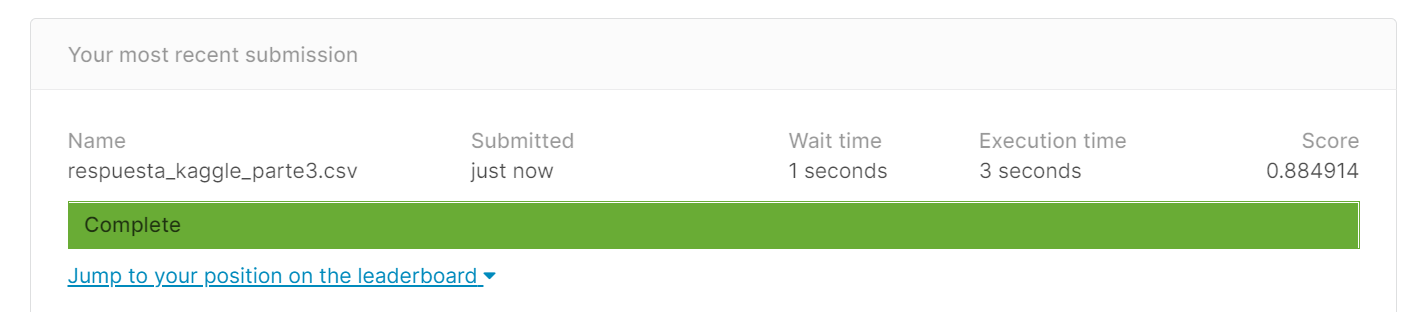